# Ridge Regression

This script implements Ridge Regression to analyze a synthetic dataset of prices based on normalized coordinates. It loads the data, normalizes the features, defines a hypothesis function, computes the Ridge cost function with regularization, and uses gradient descent to optimize the model parameters. Finally, it visualizes the data points and the fitted Ridge regression line.


Ridge Regression Optimal parameters: θ_0 = 74.47755198539215, θ_1 = 14.633006041323318
Final Ridge cost: 11.267729224376103


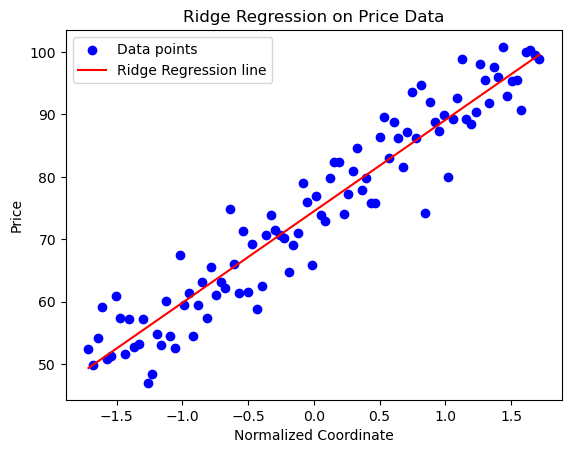

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_price_data.csv')
X = data['Coordinate'].values
y = data['Price'].values

# Normalize features
X = (X - np.mean(X)) / np.std(X)

# Hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

# Ridge cost function with regularization
def compute_cost_ridge(X, y, theta, lambda_):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost

# Gradient descent for Ridge regression
def gradient_descent_ridge(X, y, theta, alpha, num_iterations, lambda_):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradients = (1 / m) * np.array([np.sum(errors), np.sum(errors * X)])
        gradients[1] += (lambda_ / m) * theta[1]  # Regularization term for theta_1
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost_ridge(X, y, theta, lambda_)
    
    return theta, cost_history

# Initializing parameters
alpha = 0.01  # Learning rate
num_iterations = 1000
initial_theta = np.zeros(2)  # Initial parameters [theta_0, theta_1]
lambda_ = 1  # Regularization parameter

# Calling gradient descent function
optimal_theta, cost_history = gradient_descent_ridge(X, y, initial_theta, alpha, num_iterations, lambda_)

# Printing the results
print(f"Ridge Regression Optimal parameters: θ_0 = {optimal_theta[0]}, θ_1 = {optimal_theta[1]}")
print(f"Final Ridge cost: {cost_history[-1]}")

# Plotting the dataset and the Ridge regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, hypothesis(X, optimal_theta), color='red', label='Ridge Regression line')
plt.xlabel('Normalized Coordinate')
plt.ylabel('Price')
plt.title('Ridge Regression on Price Data')
plt.legend()
plt.show()
